In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from numpy.linalg import inv

## Part a

In [14]:
df = pd.read_csv("linregdata", sep=',',header=None)
df[0] = df[0].map({'M': [0,0,1], 'F': [1,0,0], 'I' : [0,1,0]})


## Part b

In [33]:
from sklearn.preprocessing import StandardScaler
y_train = df[8]
y_train=y_train.astype(np.float)
X_train = df.drop([8],axis=1)
t= X_train[0]
X_train = X_train.drop([0],axis=1)
X_train=X_train.astype(np.float)
X_train = X_train.values

scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train))

In [34]:
X_train = pd.DataFrame(X_train)
t = np.array(t)
a=[]
for i in range(len(t)):
    a.append(t[i][0])
b=[]
for i in range(len(t)):
    b.append(t[i][1])
c=[]
for i in range(len(t)):
    c.append(t[i][2])
X_train['F'] = a
X_train['I'] = b
X_train['M'] = c
x = X_train.values
y = y_train.values

## Part c

In [17]:
def mylinridgereg(x,y,l):
    w = np.dot(inv(np.dot(np.transpose(x), x) + l * np.identity(len(x[0]))) , np.dot(np.transpose(x), y))
    return w
weights = mylinridgereg(x,y,100)

In [18]:
def mylinridgeregeval(x,weights):
    val = np.dot(x,weights)
    return val
y_dash = mylinridgeregeval(x, weights)

In [19]:
def meansquarederr(T, Tdash):
    error = 0
    for i in range(len(T)):
        error += pow((T[i] - Tdash[i]), 2)
    return error/len(T)
#meansquarederr(y, y_dash)

## Part d , e

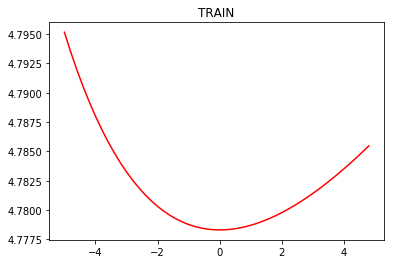

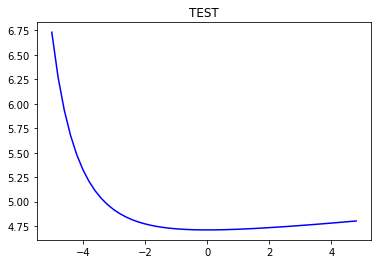

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
%matplotlib inline

l = np.arange(-5,5,0.2)
ans =[]
mini = 500

for i in range(len(l)):
    weights = mylinridgereg(X_train,y_train,l[i])
    y_dash = mylinridgeregeval(X_train, weights)
    ans.append(meansquarederr(y_train, y_dash))
    if(mini > ans[i]):
        mini = ans[i]
        l_min = l[i]
        weight_min = weights
np.asarray(ans)
weight_pos = []
for i in range(len(weight_min)):
    if weight_min[i] < 0:
        weight_pos.append(-weight_min[i])
    else:
        weight_pos.append(weight_min[i])
min_ind1 = np.argmin(weight_pos)
#print(min_ind1)
del weight_pos[min_ind1]
min_ind2 = np.argmin(weight_pos)

if(min_ind2 >= min_ind1):
    min_ind2 += 1
    
#print(min_ind2)

## Dropping the least significant attributes
X_train = np.delete(X_train,min_ind1,1)
X_train = np.delete(X_train,min_ind2,1)

ans_test = []
for i in range(len(l)):
    weights = mylinridgereg(X_test,y_test,l[i])
    y_dash = mylinridgeregeval(X_test, weights)
    ans_test.append(meansquarederr(y_test, y_dash))

plt.figure(1)
plt.title('TRAIN')
plt.plot(l,ans,'r')
plt.figure(2)
plt.title('TEST')
plt.plot(l,ans_test,'b')
plt.show()

## Part f

In [57]:
weights = mylinridgereg(X_train,y_train,l_min)
print(weights)
y_dash = mylinridgeregeval(X_train, weights)
meansquarederr(y_train, y_dash)

[ 0.0111649   1.06461088  0.35159651  5.47302337 -5.02012651 -1.24161748
  0.93647922  2.          1.75        2.25      ]


105.7120734957257

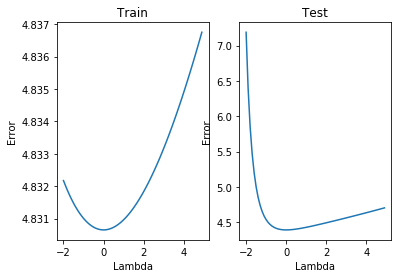

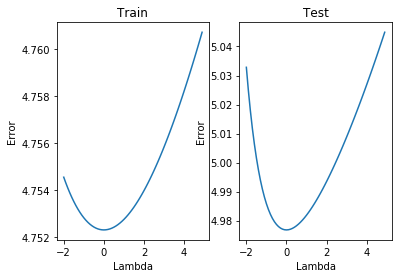

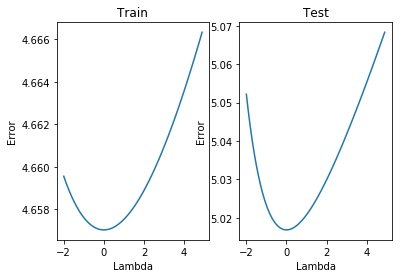

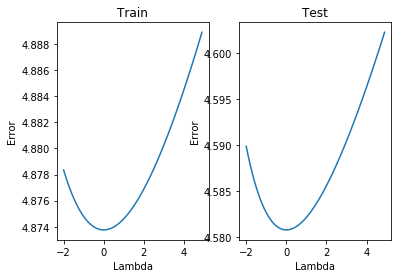

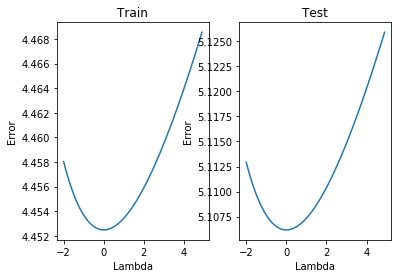

[4.638605402105895, 5.0006016356187075, 5.034657078091955, 4.587462323371597, 5.112079182247896]
3
[0.1, 0.2, 0.3, 0.4, 0.5]
avg =  [4.638605402105895, 5.0006016356187075, 5.034657078091955, 4.587462323371597, 5.112079182247896]


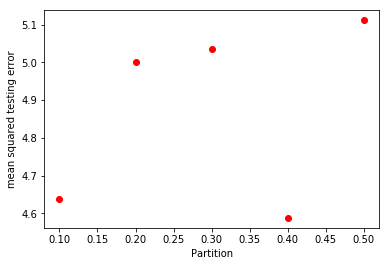

In [62]:
partition = []
ans_new_test_avg = []
for j in range(1,6):
    partition.append(j/10)
    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=j/10)
    std_new = []
    mean_new = np.mean(X_train,axis=0)
    for p in range(len(X_train[0])):
        std_new.append(np.std(X_train[:,p],axis=0))
    for k in range(len(X_train)):
        for h in range(len(X_train[0])-3):
            X_train[k,h] = (X_train[k,h] - mean_new[h])/ std_new[h]

    for u in range(len(X_test)):
        for v in range(len(X_test[0])-3):
            X_test[u,v] = X_test[u,v] - mean_new[v]/ std_new[v]
            
#     scaler = StandardScaler()
#     scaler.fit(X_train)
#     X_train = pd.DataFrame(scaler.transform(X_train))
#     X_train = X_train.values
#     scaler = StandardScaler()
#     scaler.fit(X_test)
#     X_test = pd.DataFrame(scaler.transform(X_test))
#     X_test = X_test.values
    lamb_new = np.arange(-2,5,0.1)
    ans_new_train,ans_new_test =[],[]
    
    for i in range(len(lamb_new)):
        weights_train = mylinridgereg(X_train,y_train,lamb_new[i])
        y_dash_train = mylinridgeregeval(X_train, weights_train)
        ans_new_train.append(meansquarederr(y_train, y_dash_train))

        weights_test = mylinridgereg(X_test,y_test,lamb_new[i])
        y_dash_test = mylinridgeregeval(X_test, weights_test)
        ans_new_test.append(meansquarederr(y_test, y_dash_test))
        
    ans_new_test_avg.append(sum(ans_new_test)/len(ans_new_test))

    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.plot(lamb_new,ans_new_train)
    plt.title("Train")
    plt.xlabel("Lambda")
    plt.ylabel("Error")

    plt.subplot(1,2,2)
    plt.plot(lamb_new,ans_new_test)
    plt.title("Test")
    plt.xlabel("Lambda")
    plt.ylabel("Error")
    plt.show()
 
np.asarray(ans_new_test_avg)
print(ans_new_test_avg)
print(np.argmin(ans_new_test_avg))
print(partition)
    
plt.figure(6)
print("avg = ",ans_new_test_avg)
plt.plot(partition,ans_new_test_avg,'ro')
plt.xlabel("Partition")
plt.ylabel("mean squared testing error")
plt.show()
        
        
        
                
        

## Part h

0.4
[11.1278738   9.57168433  8.50667559 ...  8.01156933  4.70355608
 11.24986091]


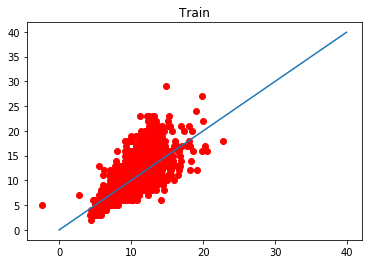

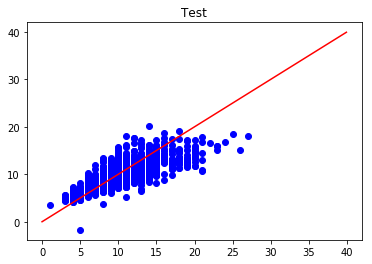

In [63]:
%matplotlib inline
xa = np.arange(0,40,0.1)
ya = xa
print(partition[np.argmin(ans_new_test_avg)])
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=partition[np.argmin(ans_new_test_avg)])

std_new_train = []
mean_new_train = np.mean(X_train,axis=0)
for p in range(len(X_train[0])):
    std_new.append(np.std(X_train[:,p],axis=0))
for k in range(len(X_train)):
    for h in range(len(X_train[0])-3):
        X_train[k,h] = (X_train[k,h] - mean_new[h])/ std_new[h]

#Standardizing the testing input variables.
std_new_test = []
mean_new_test = np.mean(X_test,axis=0)
for p in range(len(X_test[0])):
    std_new.append(np.std(X_test[:,p],axis=0))
for u in range(len(X_test)):
    for v in range(len(X_test[0])-3):
        X_test[u,v] = X_test[u,v] - mean_new[v]/ std_new[v]
        
lamb_best = l_min
weights_train_best = mylinridgereg(X_train,y_train,lamb_best)
y_dash_train_best = mylinridgeregeval(X_train, weights_train_best)
print(y_dash_train_best)

plt.figure(1)
plt.title('Train')
plt.plot(y_dash_train_best,y_train,'ro')
plt.plot(xa,ya)

weights_test_best = mylinridgereg(X_test,y_test,lamb_best)
y_dash_test_best = mylinridgeregeval(X_test, weights_test_best)

plt.figure(2)
plt.title('Test')
plt.plot(y_test,y_dash_test_best,'bo')
plt.plot(xa,ya,'r')
plt.show()
